In [1]:
import pandas as pd
df_clusters = pd.read_csv('C:\\Users\\Brend\\Downloads\\clusters_top42.csv', index_col = 'name', encoding = "UTF-8")
df_pct_collab = pd.read_csv('C:\\Users\\Brend\\Downloads\\pct_collaborative_pubs_top42.csv', index_col = 'name', encoding = 'UTF-8')
df_pct_collab_new = pd.read_csv('C:\\Users\\Brend\\Downloads\\pct_collaborative_pubs_top42_v2.csv', index_col = 'name', encoding = 'UTF-8')
df_impact = pd.read_csv('C:\\Users\\Brend\\Downloads\\impact_top42.csv', index_col = 'name', encoding = 'UTF-8')
df_author_focus = pd.read_csv('C:\\Users\\Brend\\Downloads\\community_focus_top42.csv', index_col = 'name', encoding = 'UTF-8')
# df_disrupt = pd.read_csv('C:\\Users\\Brend\\Downloads\\disrupt_top42.csv', index_col = 'name', encoding = 'UTF-8')

In [2]:
df_all = df_pct_collab.join(df_clusters[['TotalConns', 'InterClusterRatio', 'IntraClusterRatio']], how = 'outer')
df_all = df_all.join(df_impact, how = 'outer')
df_all = df_all.join(df_author_focus, how = 'outer')

In [3]:
df_trimmed = df_all[df_all['num_pubs'] >= 50]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 368618 authors


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

In [5]:
linear_metrics = ['pct_collab_linauth', 'pct_collab_linprof', 
                  'pct_collab_sqrtauth', 'pct_collab_sqrtprof', 
                  'pct_collab_unweighted', 'InterClusterRatio', 
                  'IntraClusterRatio']
log_metrics = ['IntraCommunityFocus', 'InterCommunityFocus']
all_metrics = linear_metrics + log_metrics
impact = ['avg_PR', 'max_PR', 'avg_AR', 'max_AR']
disrupt = ['avg_disrupt', 'max_disrupt', 'median_disrupt', 'min_disrupt']


In [6]:
df_log = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log[[col]]
    df_log[col + '_log'] = log_col.apply(np.log, axis=0)
df_log = df_log[[col for col in df_log.columns if 'log' in col]]

In [7]:
df_log_adjusted = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log_adjusted[[col]]
    df_log_adjusted[col + '_log_adj'] = log_col.apply(lambda x: np.log(x+1), axis=0)
df_log_adjusted = df_log_adjusted[[col for col in df_log_adjusted.columns if 'log' in col]]

In [8]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[[col]]
    df_scaled[col + '_zscore'] = ss.fit_transform(scaled_col)
df_zscores = df_scaled[[col for col in df_scaled.columns if 'zscore' in col]]

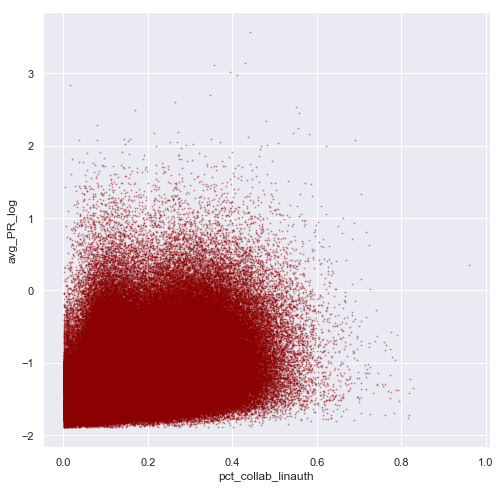

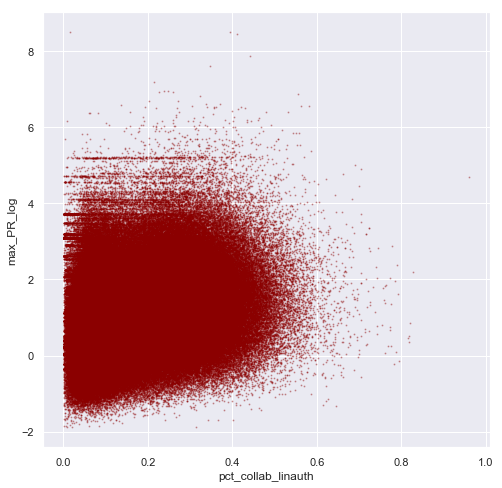

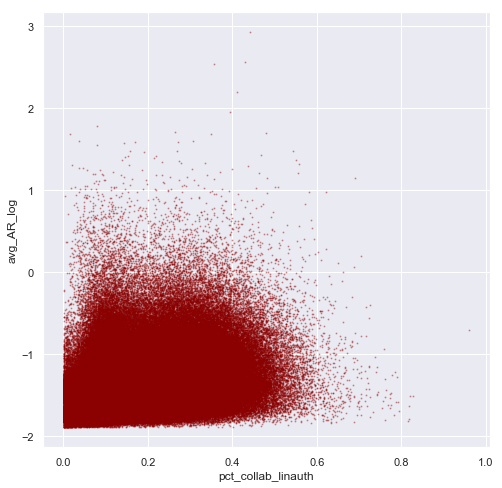

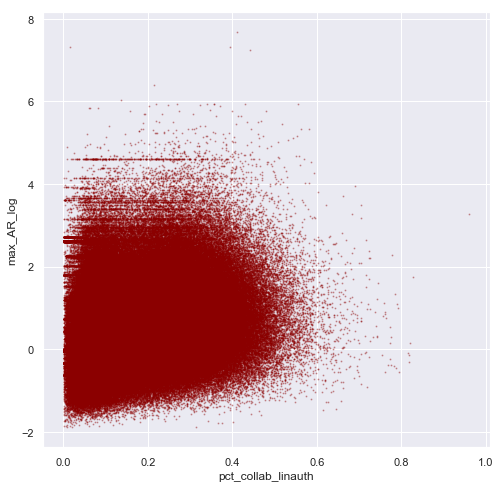

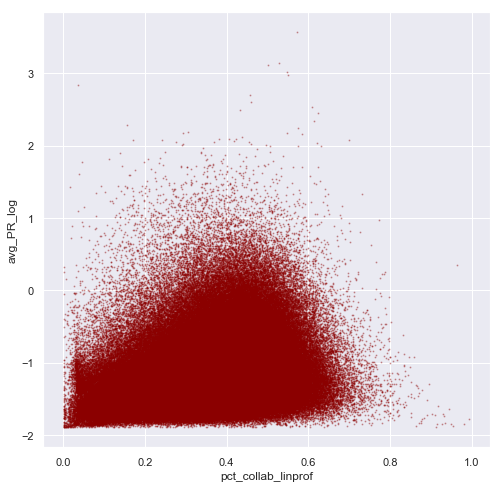

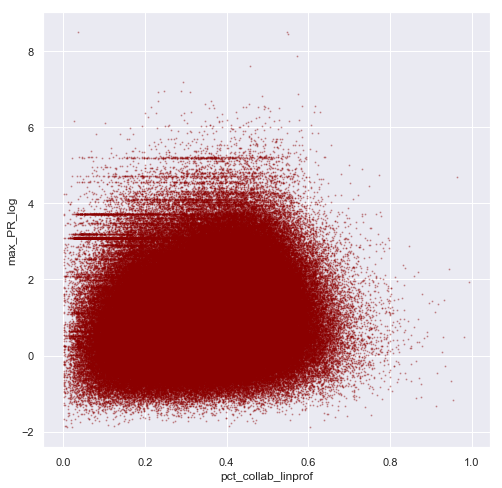

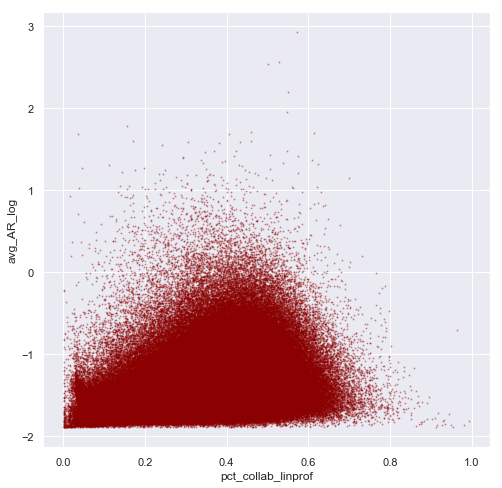

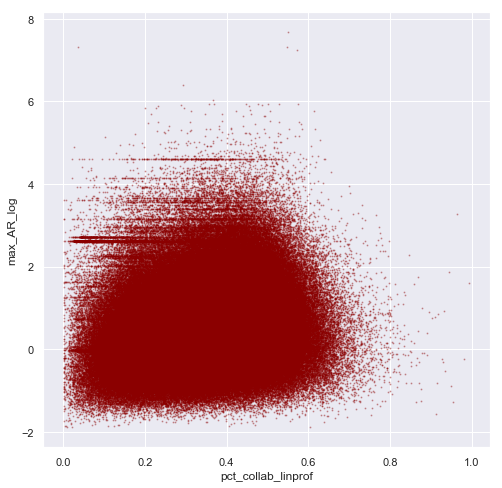

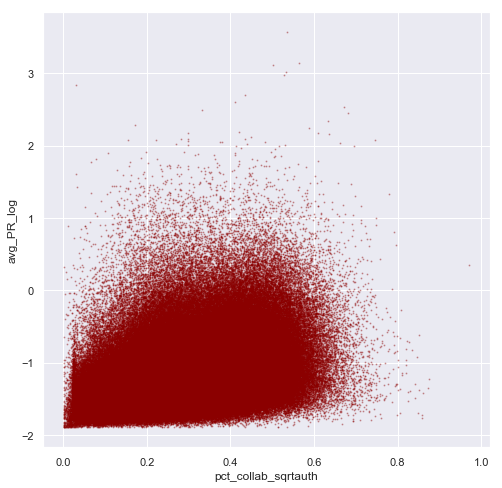

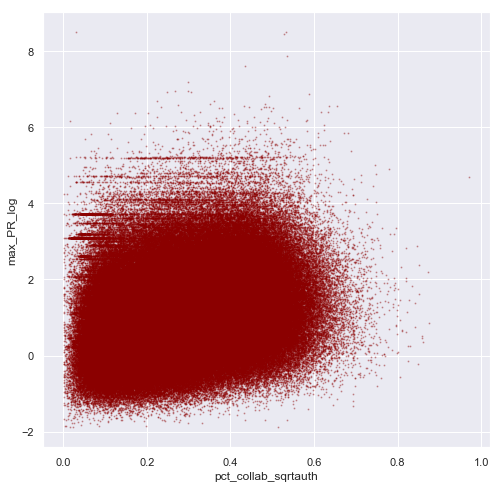

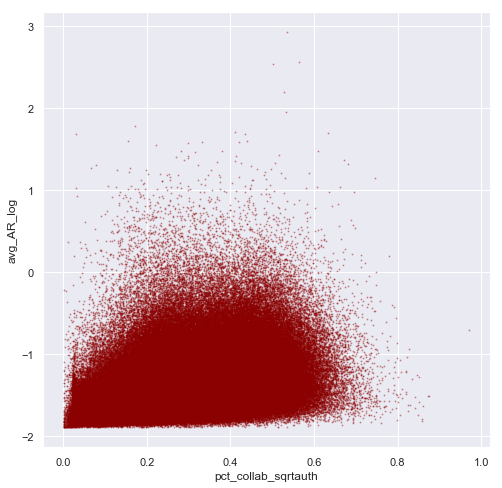

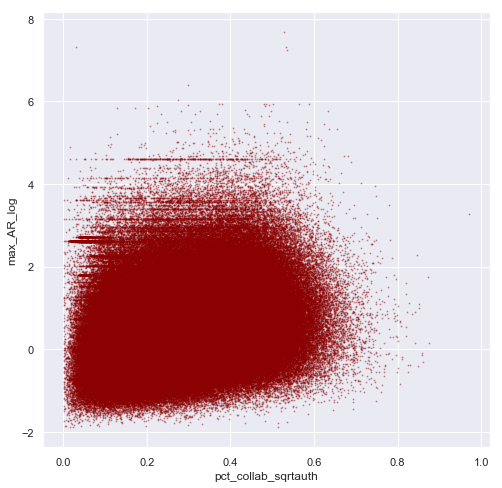

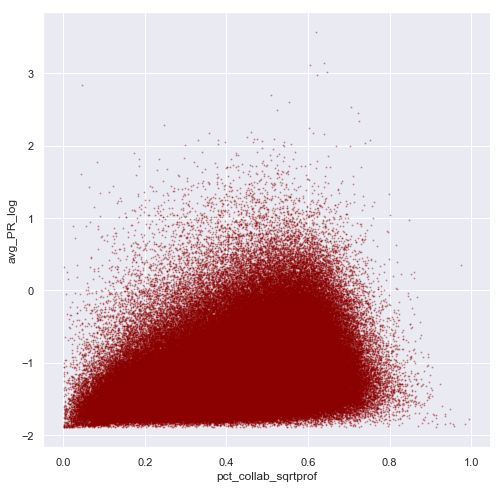

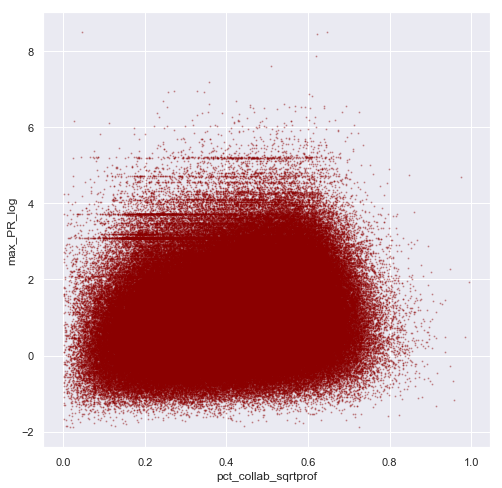

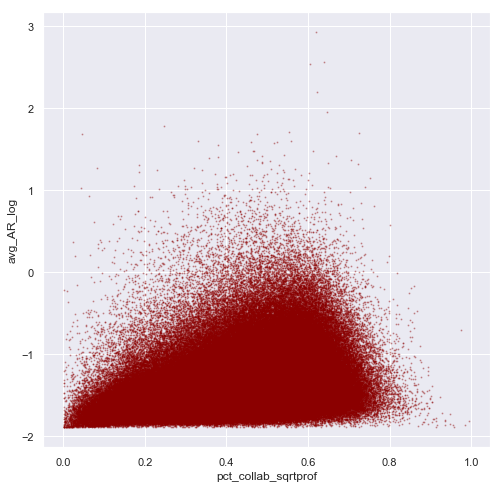

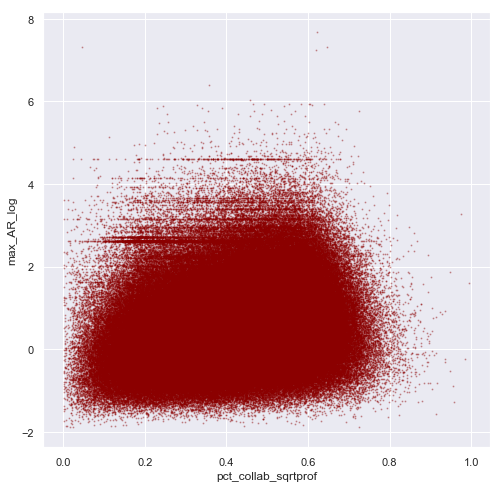

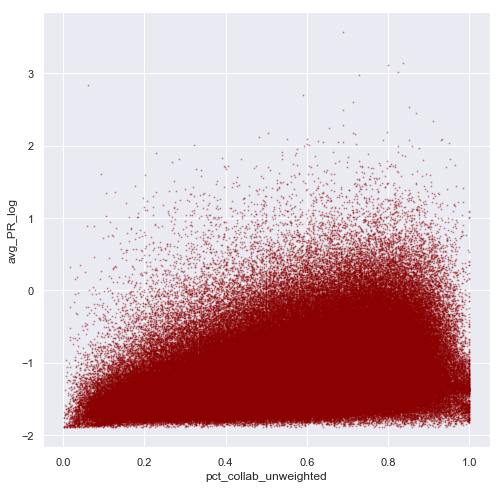

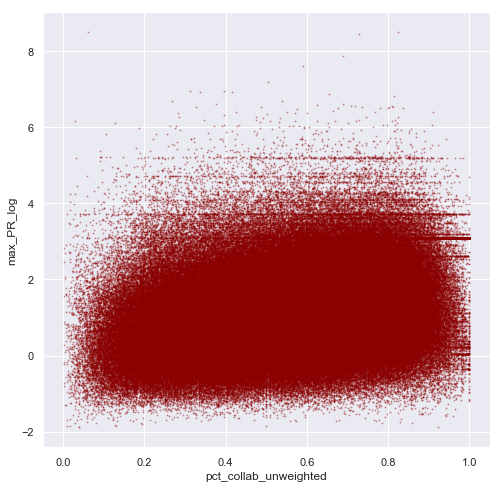

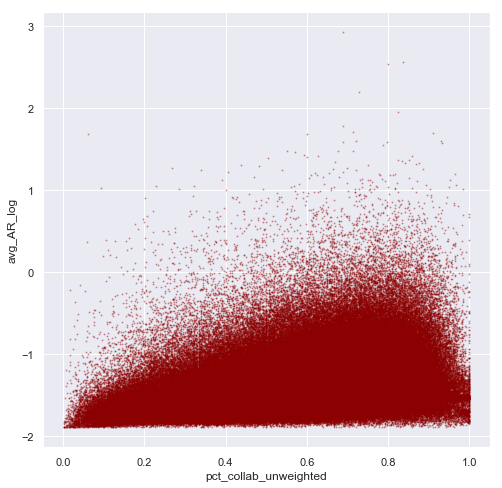

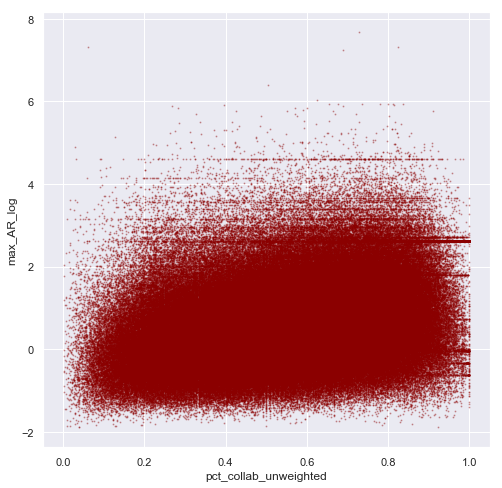

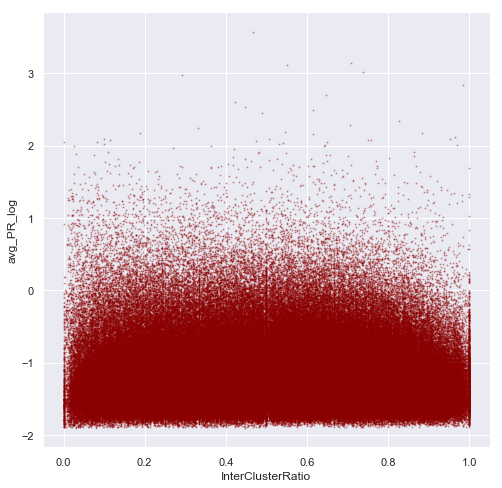

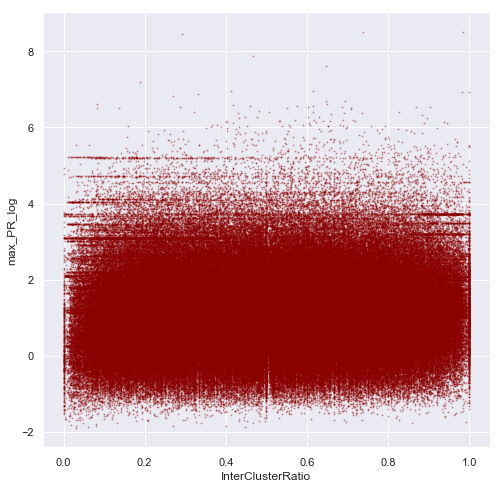

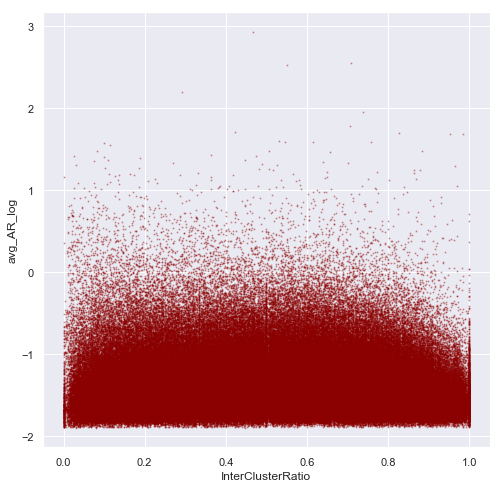

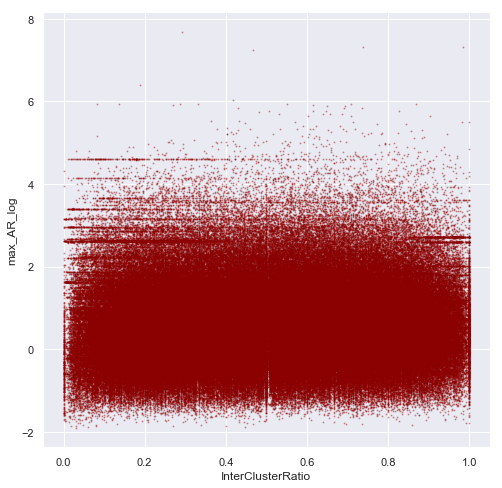

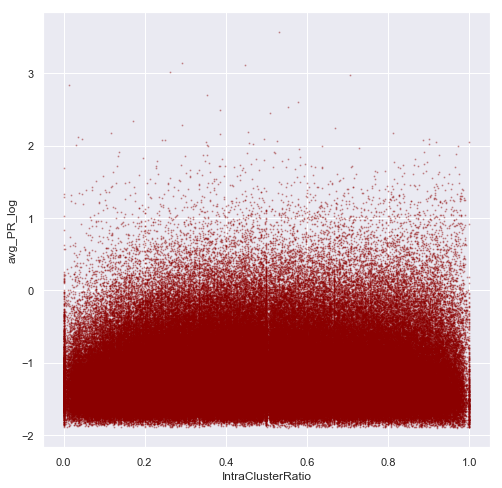

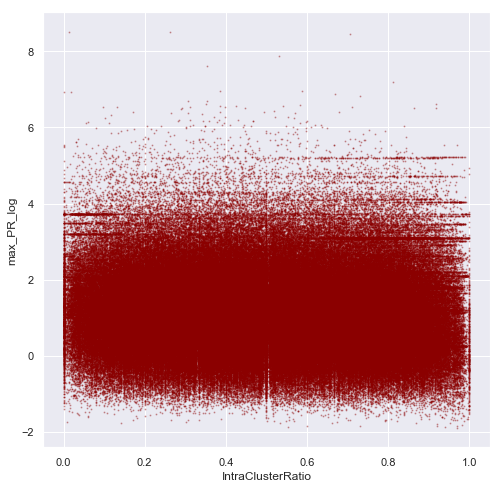

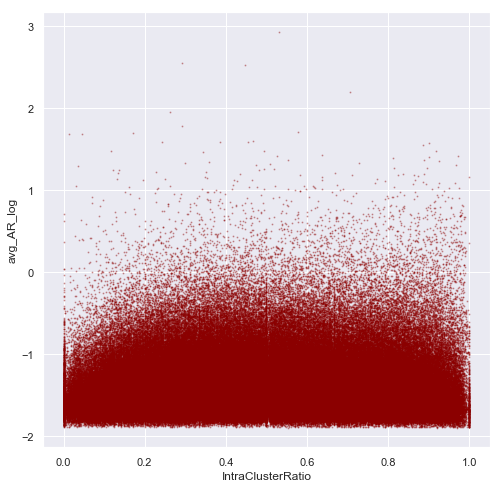

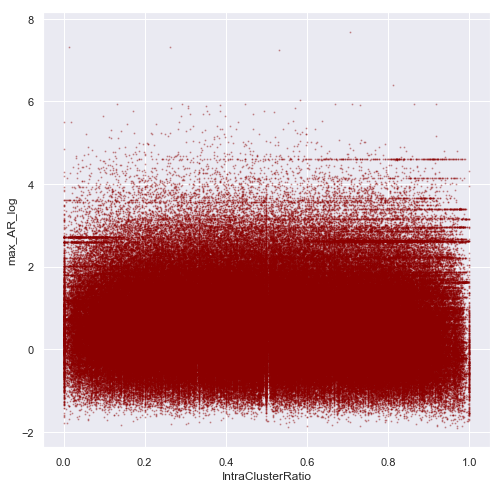

In [9]:
for x_col in linear_metrics:
    for y_col in impact:
        data = pd.concat([df_trimmed[[x_col]], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col, y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


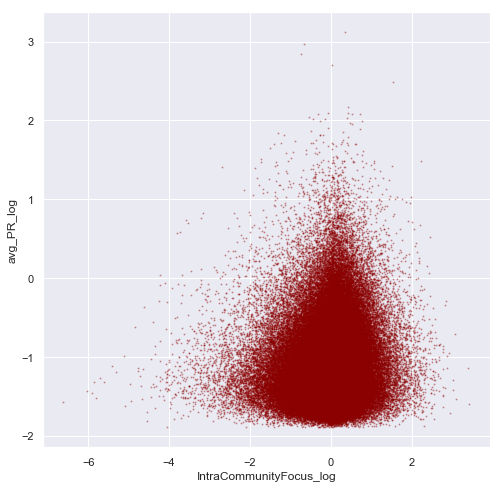

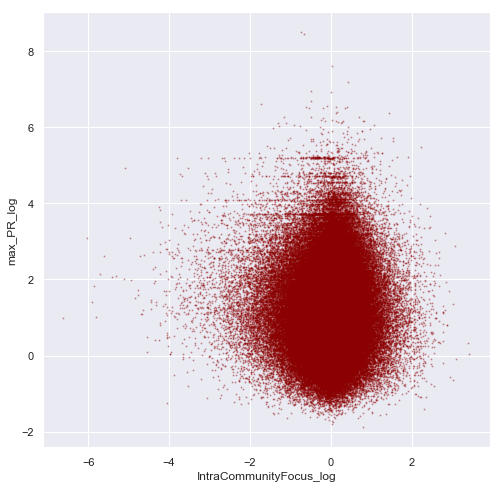

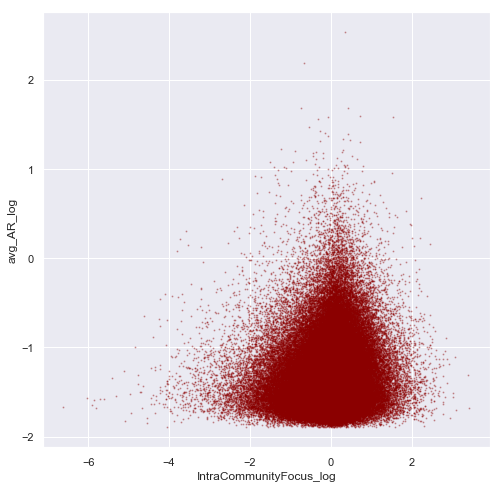

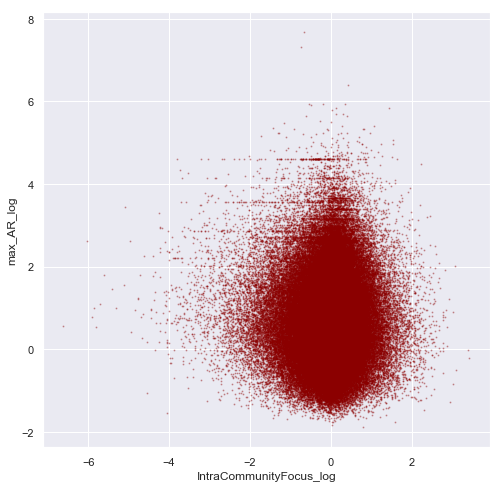

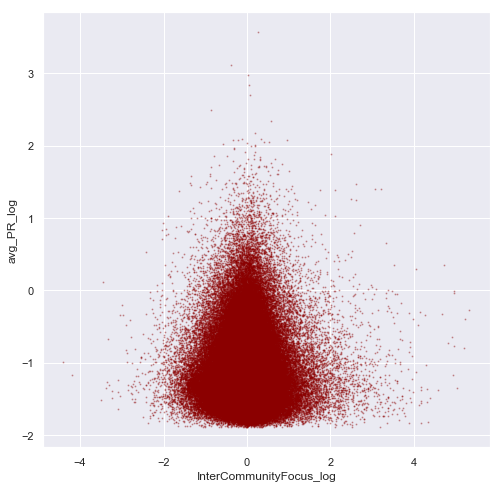

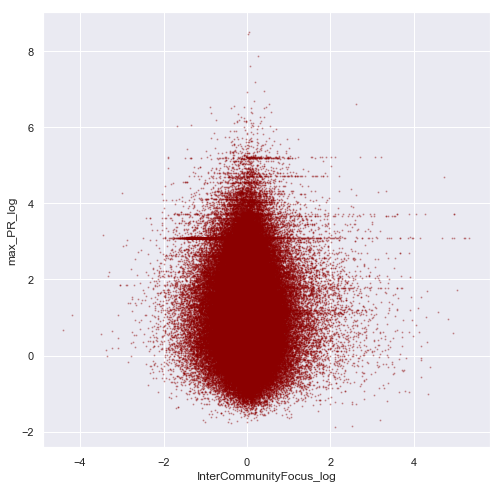

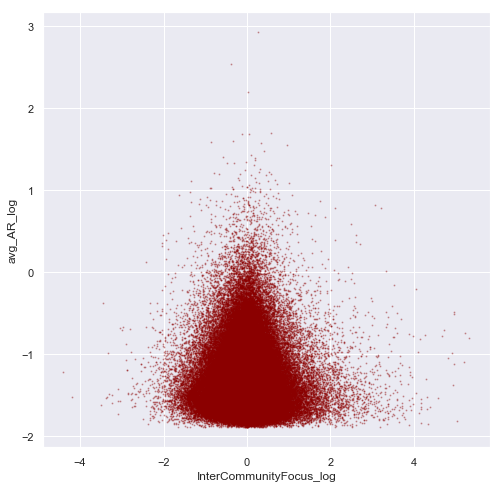

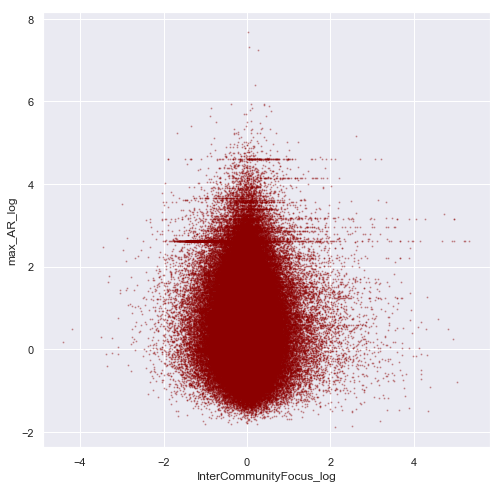

In [10]:
for x_col in log_metrics:
    for y_col in impact:
        data = pd.concat([df_log[[x_col+'_log']], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col+'_log', y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


In [ ]:
for x_col in disrupt:
    for y_col in impact:
        data = pd.concat([df_log[[x_col+'_log']], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col+'_log', y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()

In [ ]:
for x_col in disrupt:
    for y_col in log_metrics:
        data = pd.concat([df_log[[x_col+'_log']], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col+'_log', y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


In [ ]:
for x_col in linear_metrics:
    for y_col in disrupt:
        data = pd.concat([df_trimmed[[x_col]], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col, y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()

In [ ]:
df_all = df_pct_collab_new.join(df_clusters[['TotalConns', 'InterClusterRatio', 'IntraClusterRatio']], how = 'outer')
df_all = df_all.join(df_impact, how = 'outer')
df_all = df_all.join(df_author_focus, how = 'outer')
df_trimmed = df_all[df_all['num_pubs'] >= 50]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

In [ ]:
for x_col in linear_metrics:
    for y_col in impact:
        data = pd.concat([df_trimmed[[x_col]], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col, y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


In [ ]:
for x_col in linear_metrics:
    for y_col in disrupt:
        data = pd.concat([df_trimmed[[x_col]], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col, y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()